In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('D:/dataElectricityDemand/final data.csv')

In [8]:
df.head()

,Date,Chandigarh
0,2/1/2019,5.0
1,3/1/2019,4.9
2,4/1/2019,4.8
3,5/1/2019,4.3
4,6/1/2019,4.3


In [9]:
df = df.rename(columns={'Chandigarh': 'ElectricityConsumption'})

In [20]:
print(df)

          Date  ElectricityConsumption
0   2019-02-01                     5.0
1   2019-03-01                     4.9
2   2019-04-01                     4.8
3   2019-05-01                     4.3
4   2019-06-01                     4.3
..         ...                     ...
463 2020-05-19                     4.1
464 2020-05-20                     4.1
465 2020-05-21                     4.2
466 2020-05-22                     3.9
467 2020-05-23                     3.5

[468 rows x 2 columns]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    468 non-null    object 
 1   ElectricityConsumption  468 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.4+ KB


In [119]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y %H:%M:%S')
df.set_index(df['Date'])
df.head()

,Date,ElectricityConsumption
0,2019-02-01,5.0
1,2019-03-01,4.9
2,2019-04-01,4.8
3,2019-05-01,4.3
4,2019-06-01,4.3


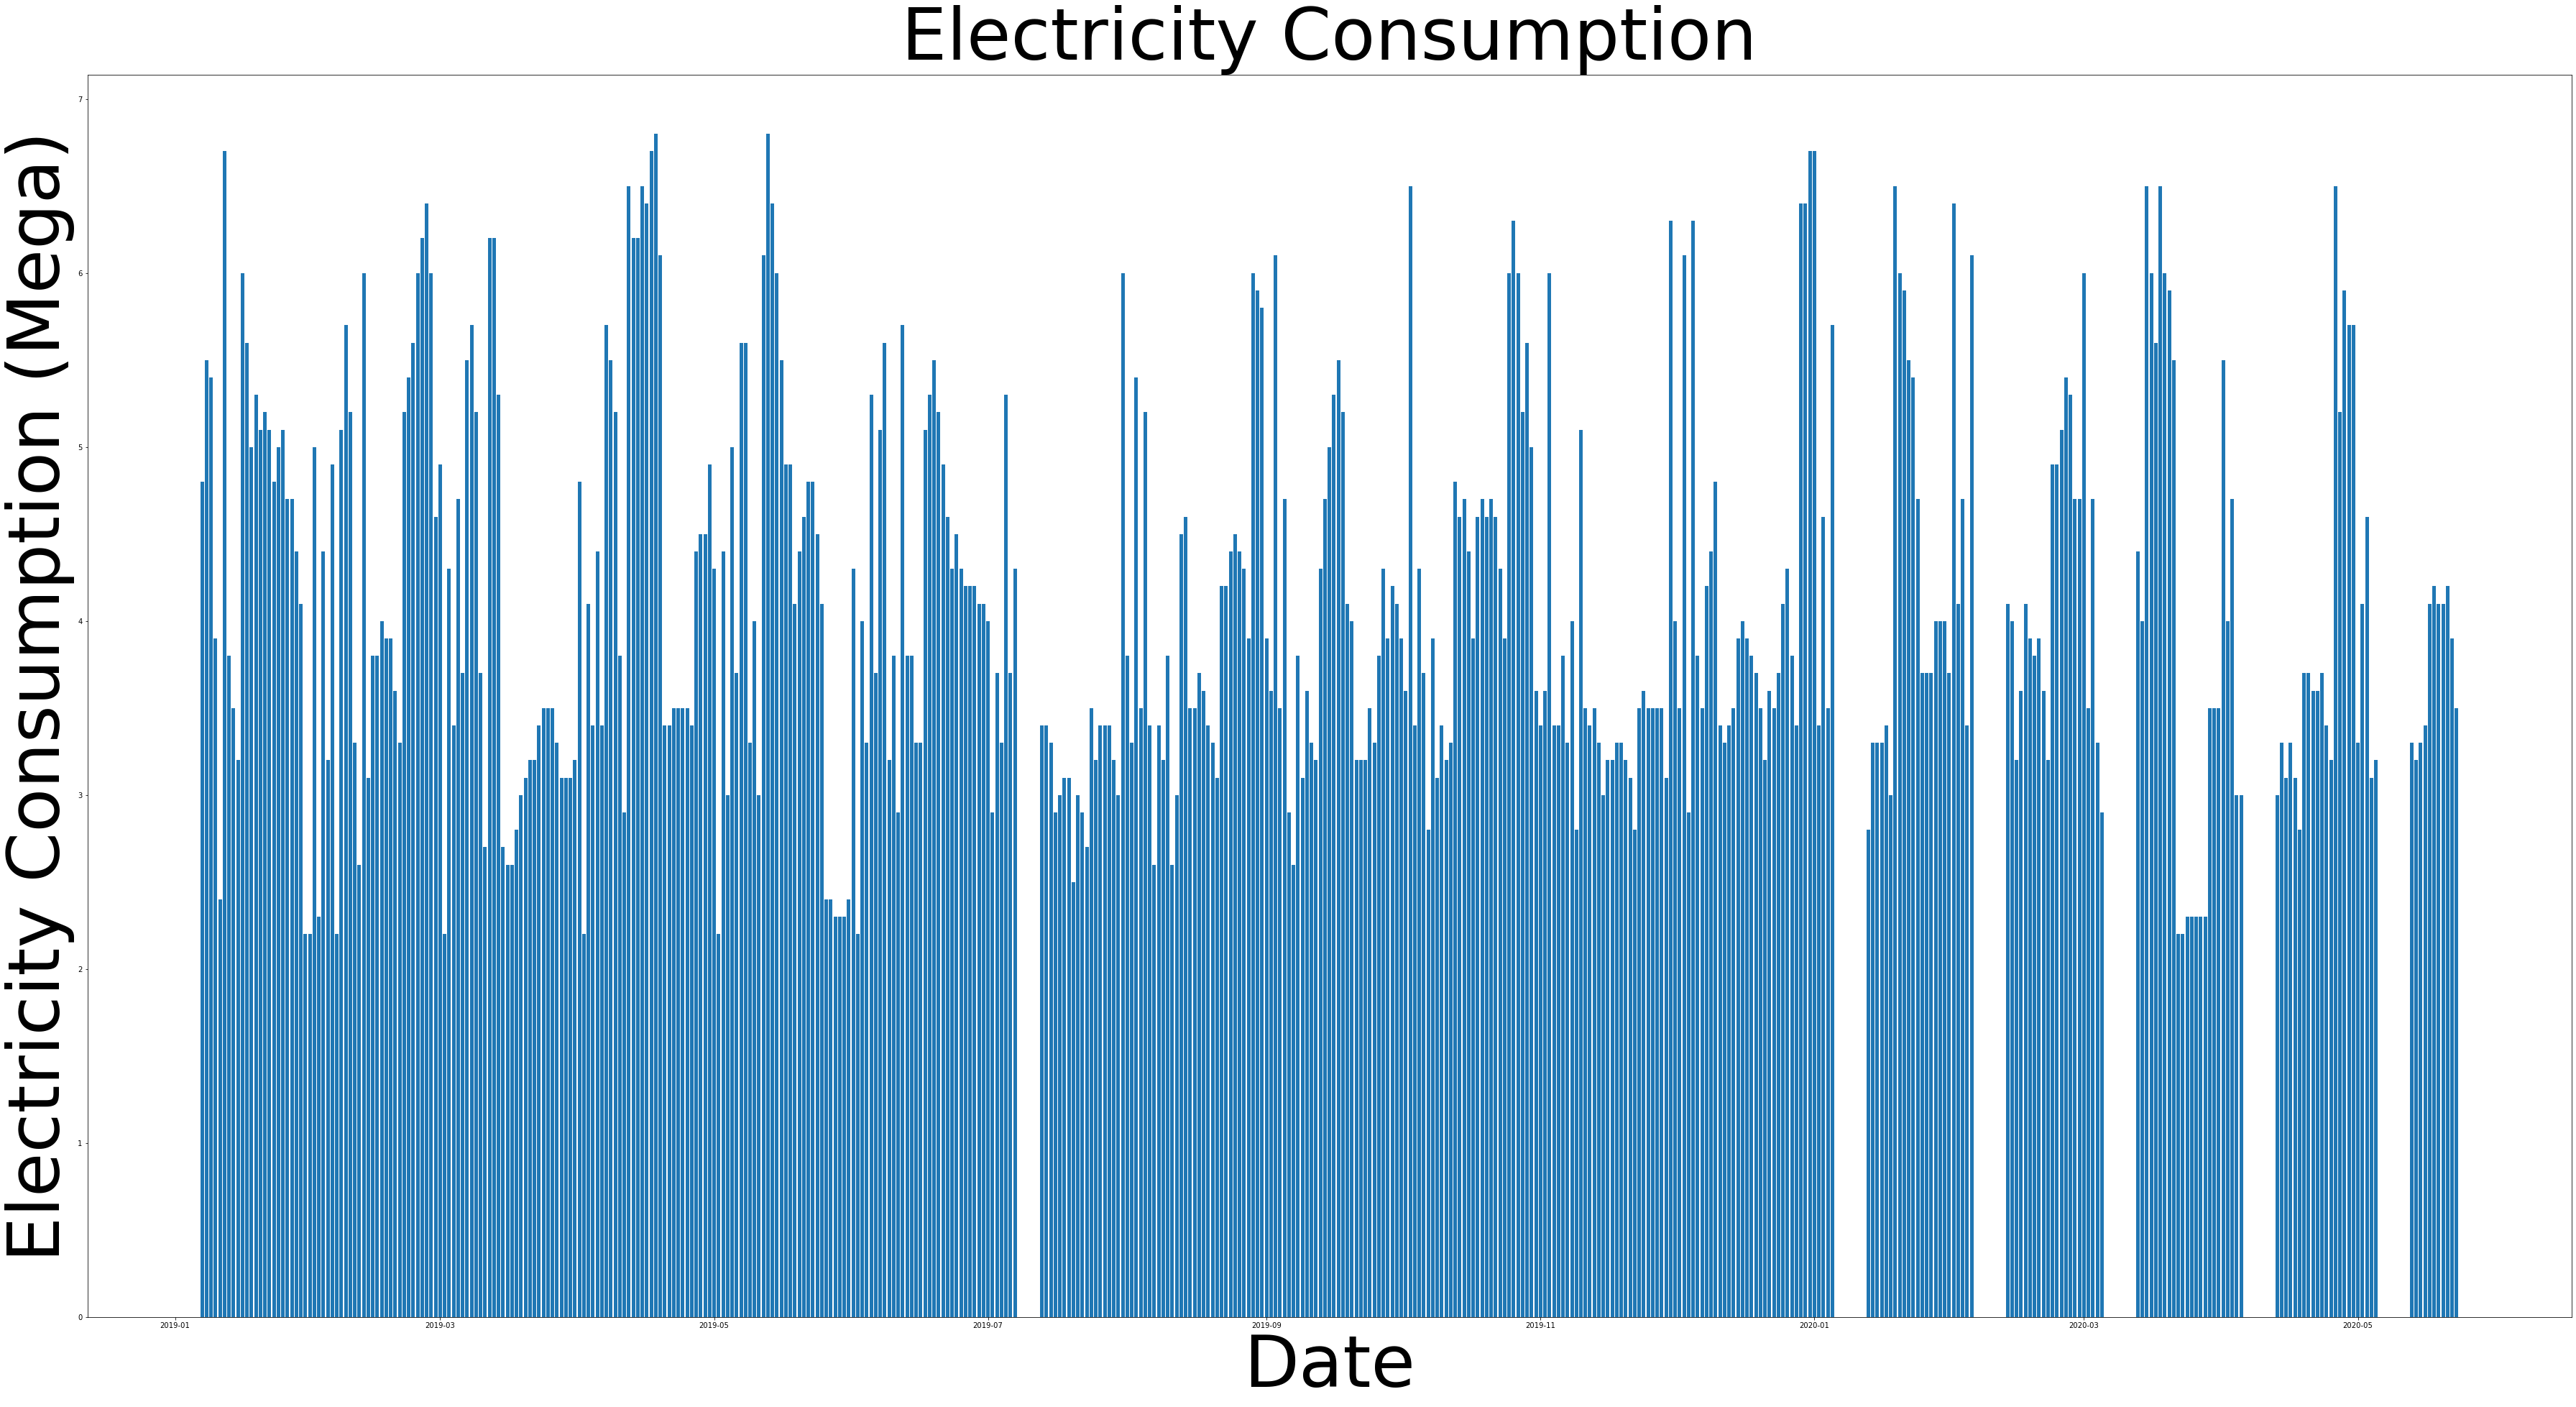

In [53]:
fig = plt.figure(figsize=(48,24))
ax = fig.add_axes([0,0,1,1])
plt.title('Electricity Consumption', fontsize=100)
ax.bar(df['Date'], df['ElectricityConsumption'])
plt.xlabel('Date', fontsize=100)
plt.ylabel('Electricity Consumption (Mega)', fontsize=100)
plt.show()

In [54]:
data=df.filter(['ElectricityConsumption'])

In [55]:
#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

375

In [56]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [57]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.60869565, 0.58695652, 0.56521739, 0.45652174, 0.45652174,
       0.39130435, 0.34782609, 0.36956522, 0.36956522, 0.26086957,
       0.39130435, 0.34782609, 0.2826087 , 0.2173913 , 0.82608696,
       0.73913043, 0.60869565, 0.67391304, 0.63043478, 0.65217391,
       0.63043478, 0.56521739, 0.60869565, 0.63043478, 0.54347826,
       0.54347826, 0.47826087, 0.41304348, 0.        , 0.        ,
       0.02173913, 0.        , 0.        , 0.        , 0.        ,
       0.15217391, 0.23913043, 0.30434783, 0.30434783, 0.30434783,
       0.2826087 , 0.19565217, 0.34782609, 0.34782609, 0.39130435,
       0.36956522, 0.36956522, 0.30434783, 0.23913043, 0.65217391,
       0.69565217, 0.73913043, 0.82608696, 0.86956522, 0.91304348,
       0.82608696, 0.52173913, 0.47826087, 0.45652174, 0.41304348])]
[0.47826086956521746]



In [58]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [59]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(315, 60, 1)

In [60]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [61]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [62]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3)

Epoch 1/3
315/315 [==============================] - 9s 19ms/step - loss: 0.0576
Epoch 2/3
315/315 [==============================] - 6s 18ms/step - loss: 0.0362
Epoch 3/3
315/315 [==============================] - 6s 18ms/step - loss: 0.0254


In [63]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [64]:
#Convert the data to a numpy array

x_test=np.array(x_test)

In [65]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [66]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [67]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.16231349360558295

<ipython-input-70-76d996a7c7d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


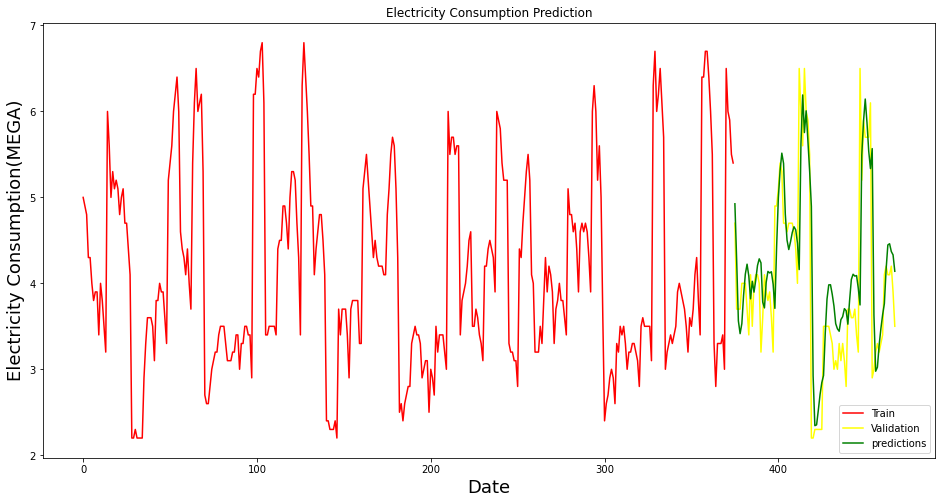

In [70]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Electricity Consumption Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Electricity Consumption(MEGA)', fontsize=18)
plt.plot(train['ElectricityConsumption'] , color='red')
plt.plot(valid['ElectricityConsumption'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.show()

In [236]:
df_new = pd.read_csv('D:/dataElectricityDemand/Winter2020.csv')

In [237]:
df_new = df_new.rename(columns={'Chandigarh': 'ElectricityConsumption'})

In [238]:
df_new.head()

,Date,ElectricityConsumption
0,1/12/2019 0:00,6.7
1,2/12/2019 0:00,6.0
2,3/12/2019 0:00,6.2
3,4/12/2019 0:00,6.5
4,5/12/2019 0:00,6.1


In [239]:
df_new = df_new.filter(['ElectricityConsumption'])

In [240]:
df_new_scaled = scaler.transform(df_new)

In [241]:
#Create an empty list
X_test=[]
#Append new df
X_test.append(df_new_scaled)

In [247]:
#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_ec = model.predict(X_test)
#undo the scaling
pred_ec=scaler.inverse_transform(pred_ec)

In [250]:
print(f'Electricity Comsumed of tomorrow:{pred_ec}')

Electricity Comsumed of tomorrow:[[5.5147686]]
